In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [168]:
color_palette = {
    'region': ['berner-mitelland', 'berner-oberland', 'freiburg-neuenburg-jura', 'graubuenden', 'nordwestschweiz', 'ostschweiz', 'tessin', 'waadt-genfersee', 'wallis', 'zentralschweiz', 'zuerich'],
    'color': ['#6CA1AF', '#EBD2B4', '#CE8389' , '#C07869', '#BE6E83', '#E67F76', '#F2B981', '#9B7E78', '#79A89D', '#ADA08C', '#8EA279']
}

In [ ]:
df_camping_all = pd.read_csv('df_camping_all.csv', encoding='utf-8')
df_camping_all

In [170]:
import folium

df_camping_map = df_camping_all[['url', 'Latitude', 'Longitude', 'region']].drop_duplicates(subset=['url'])

# Eine Folium-Karte erstellen
m = folium.Map(location=[df_camping_map['Latitude'].mean(), df_camping_map['Longitude'].mean()],tiles='Cartodb Positron', zoom_start=8.2,)

# Punkte auf die Karte hinzufügen
for idx, row in df_camping_map.iterrows():
    if row['region'] in color_palette['region']:
        color = color_palette['color'][color_palette['region'].index(row['region'])]
    else:
        color = '#CCCCCC'

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=1,
        #popup=row['name']

    ).add_to(m)

# anzeigen
display(m)

### Anzahl Einträge pro Region

In [119]:
df_region = df_camping_all[['region_berner-mitelland','region_berner-oberland','region_freiburg-neuenburg-jura','region_graubuenden','region_nordwestschweiz','region_ostschweiz','region_tessin','region_waadt-genfersee','region_wallis','region_zentralschweiz','region_zuerich']]

In [120]:
color_palette = {
    'region': ['region_berner-mitelland', 'region_berner-oberland', 'region_freiburg-neuenburg-jura', 'region_graubuenden', 'region_nordwestschweiz', 'region_ostschweiz', 'region_tessin', 'region_waadt-genfersee', 'region_wallis', 'region_zentralschweiz', 'region_zuerich'],
    'color': ['#6CA1AF', '#EBD2B4', '#CE8389' , '#C07869', '#BE6E83', '#E67F76', '#F2B981', '#9B7E78', '#79A89D', '#ADA08C', '#8EA279']
}


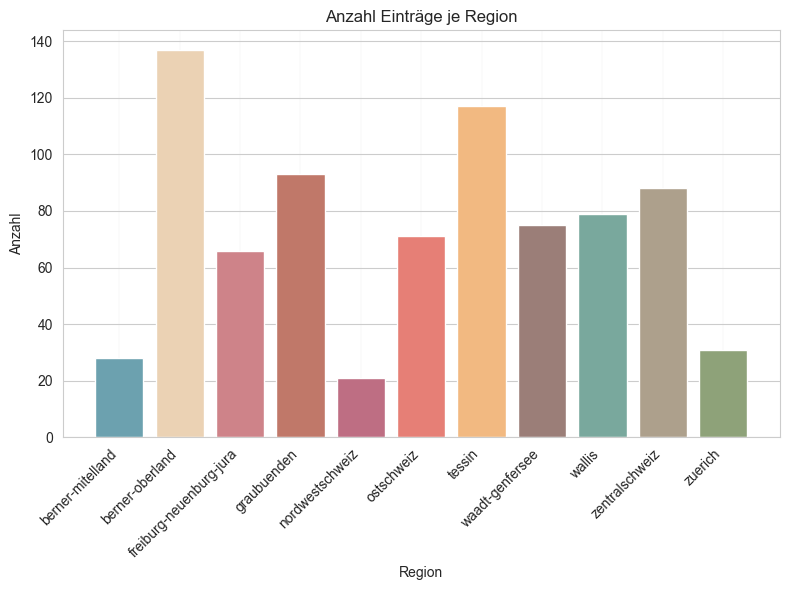

In [121]:
# Anzahl Einträge
fig, ax = plt.subplots(figsize=(8, 6))

# Anzahl der Zeilen im DataFrame
num_rows = len(df_region)

# Schleife über jede Spalte im DataFrame
for i, col in enumerate(df_region.columns):
    values = df_region[col].values
    region = col.lower()

    # Farbe abrufen
    if region in color_palette['region']:
        color = color_palette['color'][color_palette['region'].index(region)]
    else:
        color = '#CCCCCC'

    # Höhe der Säule
    ax.bar(i, sum(values), color=color)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Anzahl')
ax.set_xlabel('Region')
ax.set_title('Anzahl Einträge je Region')

xticklabels = [col[7:] for col in df_region.columns]
ax.set_xticks(range(len(df_region.columns)))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

# Vertikale Hilfslinien ausschalten
ax.grid(which='major', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

### Plot für binäre Werte (-> alle in einem)

In [146]:
df_biaer = df_camping_all[['pitch at the waterfront','other accommodation','small pitch (<80 m2)','medium pitch  (~100 m2)','large pitch  (>110 m2)','main season','low season','sport field','golf','tennis', 'indoor swimming pool','unheated pool','bathing facilities','boat rental','bike rental','entertainment','playground','disco','wifi','TV lounge','easy access for disabled people','animals allowed','kitchen','BBQ area','restaurant','take away','shop with limited range','kiosk','shopping centre','shop with rich range','washing machine','laundry dryer / tumble dryer','hiking','lake with sandy beach','lake with stony beach','river','train station','bus','VSC membership','TCS membership','SCCV membership']]

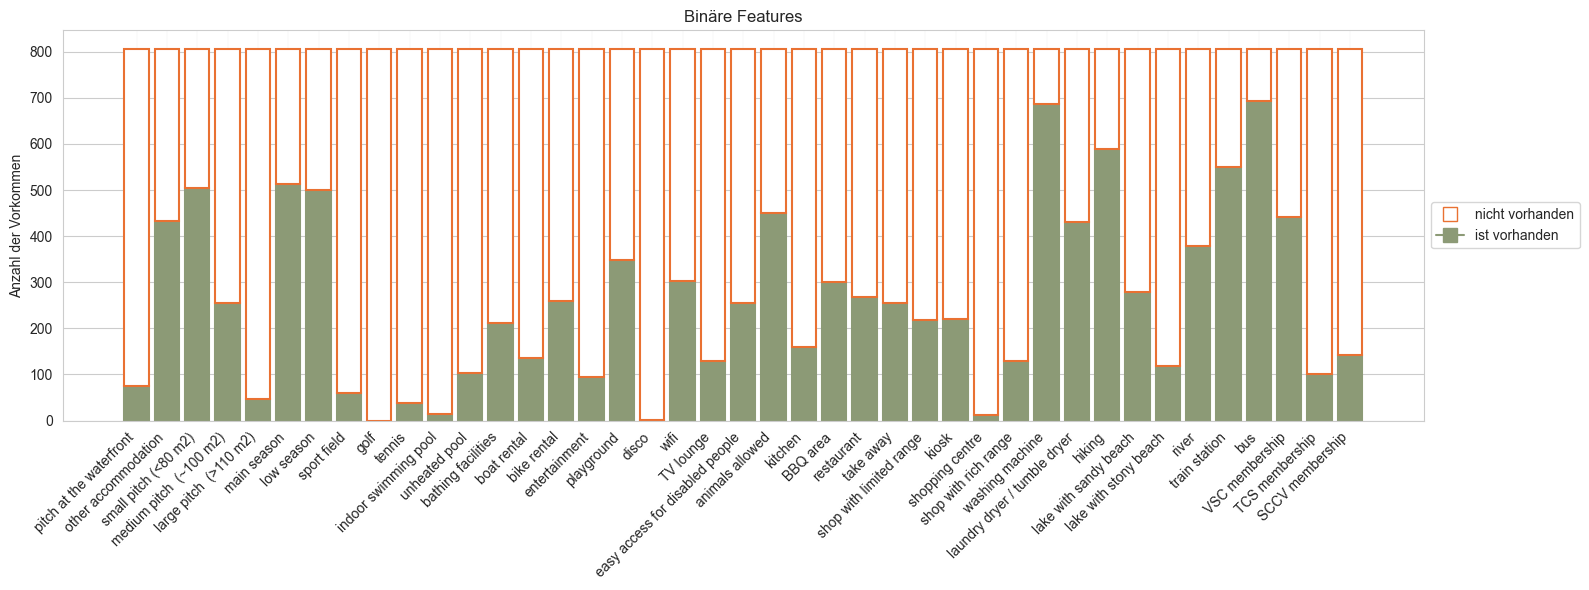

In [163]:
import matplotlib.pyplot as plt

# Gestapeltes Säulendiagramm erstellen
fig, ax = plt.subplots(figsize=(16, 6))

# Anzahl der Zeilen im DataFrame
num_rows = len(df_biaer)

# Schleife über jede Spalte im DataFrame
for i, col in enumerate(df_biaer.columns):
    values = df_biaer[col].values

    # Höhe der unteren Säule (1-Werte)
    ax.bar(i, sum(values), color='#8C9A76',edgecolor='#8C9A76', linewidth=1.5,)

    # Höhe der oberen Säule (0-Werte)
    ax.bar(i, num_rows - sum(values), bottom=sum(values), color='white', edgecolor='#E97132', linewidth=1.5,)

# Achsenbeschriftungen und Titel hinzufügen
#ax.set_xlabel('Kantone')
ax.set_ylabel('Anzahl der Vorkommen')
ax.set_title('Binäre Features')
ax.set_xticks(range(len(df_biaer.columns)))
ax.set_xticklabels(df_biaer.columns, rotation=45, ha='right')

legend_elements = [plt.Line2D([0], [0], marker='s', color='white', markeredgecolor='#E97132', linewidth=1.5, label='nicht vorhanden', markersize=10),
                   plt.Line2D([0], [0], marker='s', color='#8C9A76', label='ist vorhanden', markersize=10)]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Vertikale Hilfslinien ausschalten
ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten


plt.tight_layout()
plt.show()


In [161]:
df_biaer.describe()
summary = df_biaer.describe().loc[['mean', 'std']]
summary

,pitch at the waterfront,other accommodation,small pitch (<80 m2),medium pitch (~100 m2),large pitch (>110 m2),main season,low season,sport field,golf,tennis,...,laundry dryer / tumble dryer,hiking,lake with sandy beach,lake with stony beach,river,train station,bus,VSC membership,TCS membership,SCCV membership
mean,0.094293,0.537221,0.626551,0.316377,0.057072,0.635236,0.619107,0.073201,0.0,0.048387,...,0.533499,0.730769,0.346154,0.146402,0.468983,0.681141,0.861042,0.547146,0.126551,0.176179
std,0.292417,0.498922,0.484020,0.465351,0.232124,0.481663,0.485908,0.260628,0.0,0.214716,...,0.499186,0.443836,0.476038,0.353728,0.499347,0.466323,0.346117,0.498081,0.332676,0.381209


### Histogramme für weitere Merkmale

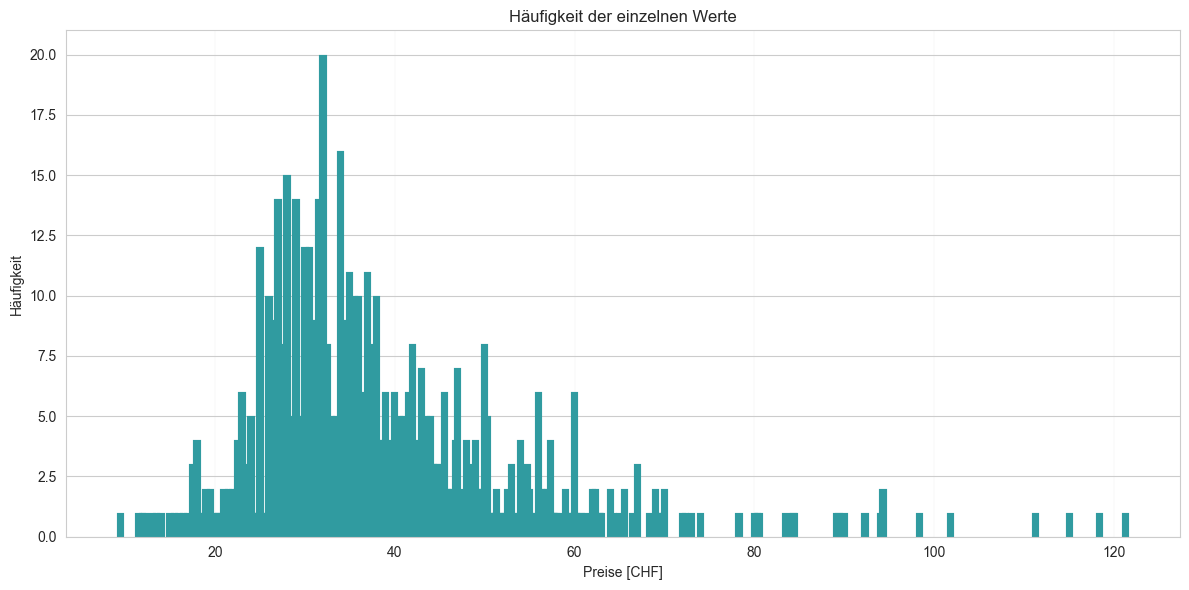

In [152]:
# Werte zählen
value_counts = df_camping_all['total_price'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#309BA0', edgecolor='#309BA0', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Preise [CHF]')
ax.set_title('Häufigkeit der einzelnen Werte')

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

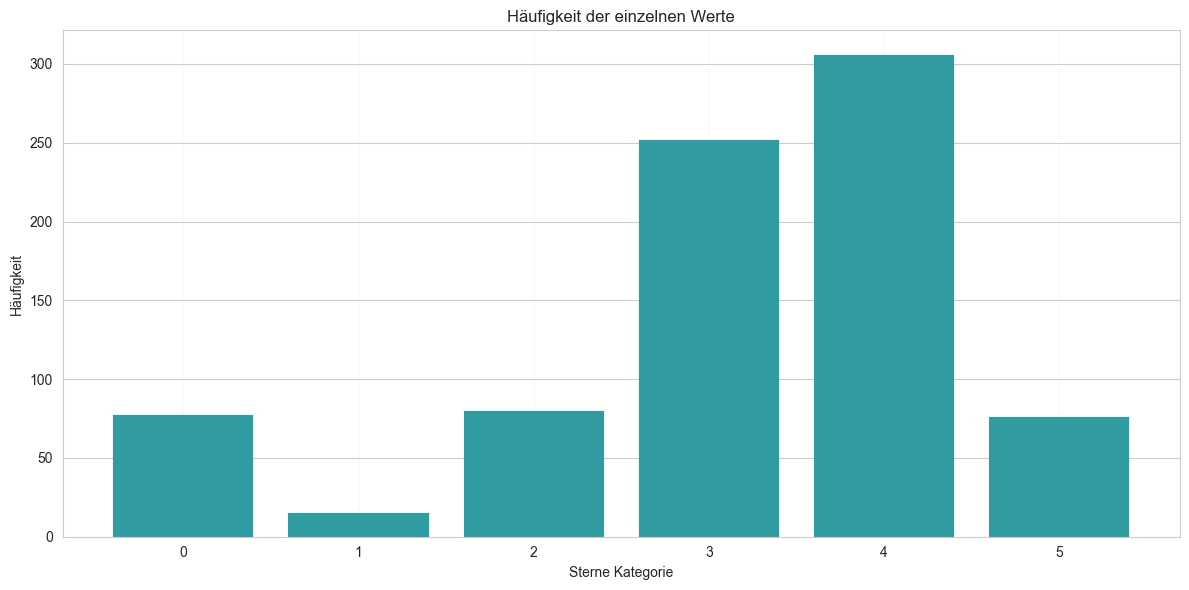

In [153]:
# Werte zählen
value_counts = df_camping_all['star category'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#309BA0', edgecolor='#309BA0', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Sterne Kategorie')
ax.set_title('Häufigkeit der einzelnen Werte')

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

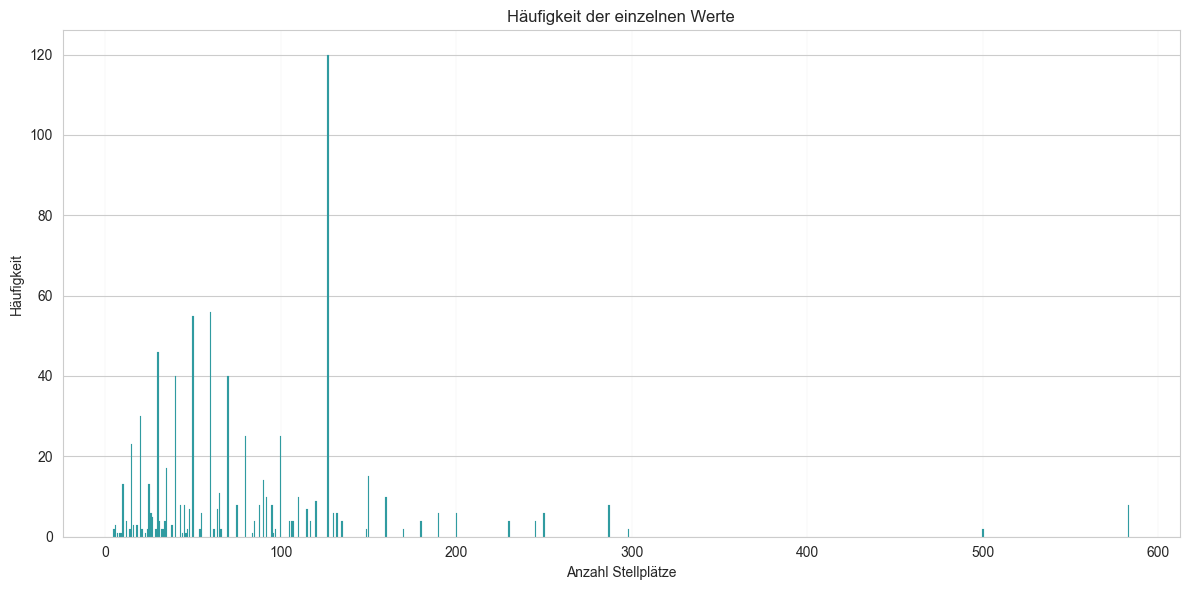

In [154]:
# Werte zählen
value_counts = df_camping_all['tourist pitches'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#309BA0', edgecolor='#309BA0', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Anzahl Stellplätze')
ax.set_title('Häufigkeit der einzelnen Werte')

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

#-> 120 Mal sind die Anzahl Stellplätze 127


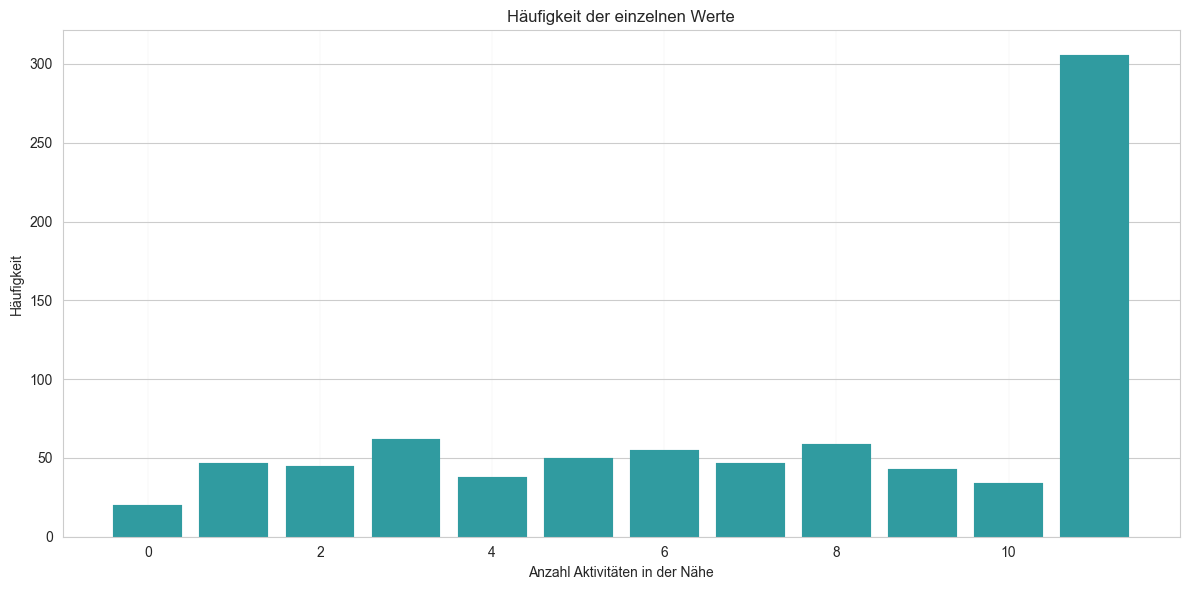

In [155]:
# Werte zählen
value_counts = df_camping_all['activities'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#309BA0', edgecolor='#309BA0', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Anzahl Aktivitäten in der Nähe')
ax.set_title('Häufigkeit der einzelnen Werte')

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

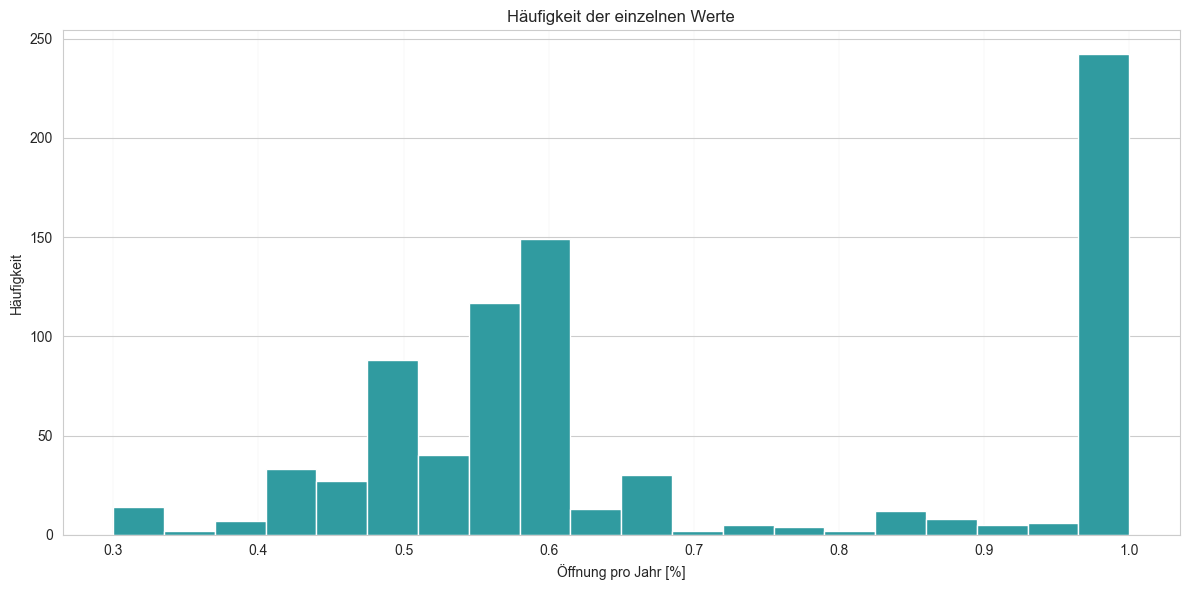

In [156]:
# Preis
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(df_camping_all['open[%]'],
        bins=20,
        color='#309BA0')

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Öffnung pro Jahr [%]')
ax.set_title('Häufigkeit der einzelnen Werte')

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()